# **Stage 1**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import datetime
%matplotlib inline
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')

In [ ]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [ ]:
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
187875,2021-11-18,Zimbabwe,NaN,133593,0.0,4699
187876,2021-11-19,Zimbabwe,NaN,133593,0.0,4699
187877,2021-11-20,Zimbabwe,NaN,133615,0.0,4699
187878,2021-11-21,Zimbabwe,NaN,133647,0.0,4699


In [ ]:
df.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [ ]:
df.drop(['Province/State'],axis=1,inplace=True)

In [ ]:
df

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0
...,...,...,...,...,...
187875,2021-11-18,Zimbabwe,133593,0.0,4699
187876,2021-11-19,Zimbabwe,133593,0.0,4699
187877,2021-11-20,Zimbabwe,133615,0.0,4699
187878,2021-11-21,Zimbabwe,133647,0.0,4699


In [ ]:
df.describe()

,Confirmed,Recovered,Deaths
count,1.878800e+05,1.771440e+05,187880.000000
mean,3.415291e+05,1.311205e+05,7632.821530
std,2.096447e+06,9.312768e+05,40429.333739
min,0.000000e+00,0.000000e+00,0.000000
25%,1.710000e+02,0.000000e+00,1.000000
50%,3.048500e+03,4.580000e+02,47.000000
75%,6.749200e+04,1.217475e+04,1144.000000
max,4.788817e+07,3.097475e+07,772344.000000


In [ ]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.463994,0.931740
Recovered,0.463994,1.000000,0.451178
Deaths,0.931740,0.451178,1.000000


Current Cases = Confirmed Cases - Recovered Cases - Deaths

In [ ]:
df['CurrentCase'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [ ]:
df.head()

,Date,Country/Region,Confirmed,Recovered,Deaths,CurrentCase
0,2020-01-22,Afghanistan,0,0.0,0,0.0
1,2020-01-23,Afghanistan,0,0.0,0,0.0
2,2020-01-24,Afghanistan,0,0.0,0,0.0
3,2020-01-25,Afghanistan,0,0.0,0,0.0
4,2020-01-26,Afghanistan,0,0.0,0,0.0


In [ ]:
date_df = df.groupby('Date')[['Confirmed','Recovered','Deaths','CurrentCase']].sum()

In [ ]:
date_df.head()

,Confirmed,Recovered,Deaths,CurrentCase
Date,,,,
2020-01-22,557,30.0,17,510.0
2020-01-23,655,32.0,18,605.0
2020-01-24,941,39.0,26,876.0
2020-01-25,1434,42.0,42,1350.0
2020-01-26,2118,56.0,56,2005.0


In [ ]:
date_df.tail()

,Confirmed,Recovered,Deaths,CurrentCase
Date,,,,
2021-11-18,256072650,0.0,5132202,249202002.0
2021-11-19,256692023,0.0,5140519,249810262.0
2021-11-20,257168692,0.0,5146467,250279284.0
2021-11-21,257555773,0.0,5150868,250660496.0
2021-11-22,258268823,0.0,5159195,251360787.0


#**Stage 2: Predicting using FB Prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
full_df = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
full_df

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185323,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210812,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,5.0,1.0,NaN,NaN,NaN,118754.0,4047.0,62.04,62.04,60.71,60.71,NaN,52.08,NaN,59.52,NaN,0.0
185324,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210813,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,5.0,1.0,NaN,NaN,NaN,119508.0,4073.0,62.04,62.04,60.71,60.71,NaN,52.08,NaN,59.52,NaN,0.0
185325,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210814,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,5.0,1.0,NaN,NaN,NaN,119853.0,4090.0,62.04,62.04,60.71,60.71,NaN,52.08,NaN,59.52,NaN,0.0
185326,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210815,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,5.0,1.0,NaN,NaN,NaN,120088.0,4109.0,62.04,62.04,60.71,60.71,NaN,52.08,NaN,59.52,NaN,0.0


In [ ]:
full_df.head()      #FIRST FIVE DATA OF THE DATASET

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
full_df.tail()     #FINDING LAST FEW LINES OF THE DATASET

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
181891,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210801,0.0,NaN,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,5.0,1.0,0.0,NaN,NaN,109546.0,3583.0,62.04,62.04,60.71,60.71,52.08,52.08,59.52,59.52,0.0,0.0
181892,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210802,0.0,NaN,2.0,1.0,2.0,1.0,3.0,1.0,0.0,NaN,2.0,1.0,2.0,1.0,2.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,5.0,1.0,0.0,NaN,NaN,110855.0,3635.0,62.04,62.04,60.71,60.71,52.08,52.08,59.52,59.52,0.0,0.0
181893,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112435.0,3676.0,NaN,62.04,NaN,60.71,NaN,52.08,NaN,59.52,NaN,0.0
181894,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113526.0,3711.0,NaN,62.04,NaN,60.71,NaN,52.08,NaN,59.52,NaN,0.0
181895,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.04,NaN,60.71,NaN,52.08,NaN,59.52,NaN,0.0


Extracting US Data of the whole Data

In [ ]:
division = 'country'
region = 'United States'
#'ConfirmedCases' or 'ConfirmedDeaths'
prediction = 'ConfirmedCases'
full_df = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv',
                usecols=['Date','CountryName','RegionName','Jurisdiction',
                           'ConfirmedCases','ConfirmedDeaths'],
                parse_dates=['Date'],
                encoding="ISO-8859-1",
                dtype={"RegionName": str,
                        "CountryName":str})

if division == 'country':
    df = full_df[(full_df['Jurisdiction'] == 'NAT_TOTAL') & (full_df['CountryName'] == region)][:-1]
elif division == 'state':
    df = full_df[(full_df['Jurisdiction'] == 'STATE_TOTAL') & (full_df['RegionName'] == region)][:-1]

In [ ]:
df

,CountryName,RegionName,Jurisdiction,Date,ConfirmedCases,ConfirmedDeaths
146333,United States,NaN,NAT_TOTAL,2020-01-01,NaN,NaN
146334,United States,NaN,NAT_TOTAL,2020-01-02,NaN,NaN
146335,United States,NaN,NAT_TOTAL,2020-01-03,NaN,NaN
146336,United States,NaN,NAT_TOTAL,2020-01-04,NaN,NaN
146337,United States,NaN,NAT_TOTAL,2020-01-05,NaN,NaN
...,...,...,...,...,...,...
146910,United States,NaN,NAT_TOTAL,2021-07-31,34978276.0,613157.0
146911,United States,NaN,NAT_TOTAL,2021-08-01,35003417.0,613228.0
146912,United States,NaN,NAT_TOTAL,2021-08-02,35131393.0,613679.0
146913,United States,NaN,NAT_TOTAL,2021-08-03,35237950.0,614295.0


In [ ]:
df

,CountryName,RegionName,Jurisdiction,Date,ConfirmedCases,ConfirmedDeaths
146333,United States,NaN,NAT_TOTAL,2020-01-01,NaN,NaN
146334,United States,NaN,NAT_TOTAL,2020-01-02,NaN,NaN
146335,United States,NaN,NAT_TOTAL,2020-01-03,NaN,NaN
146336,United States,NaN,NAT_TOTAL,2020-01-04,NaN,NaN
146337,United States,NaN,NAT_TOTAL,2020-01-05,NaN,NaN
...,...,...,...,...,...,...
146910,United States,NaN,NAT_TOTAL,2021-07-31,34978276.0,613157.0
146911,United States,NaN,NAT_TOTAL,2021-08-01,35003417.0,613228.0
146912,United States,NaN,NAT_TOTAL,2021-08-02,35131393.0,613679.0
146913,United States,NaN,NAT_TOTAL,2021-08-03,35237950.0,614295.0


**RENAMING DATASET FOR FORECASTING**

In [ ]:
cdf = df[['Date','ConfirmedCases']].rename({'Date':'ds','ConfirmedCases':'y'},axis = 'columns')
print(cdf.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


In [ ]:
cdf['ds']

146333   2020-01-01
146334   2020-01-02
146335   2020-01-03
146336   2020-01-04
146337   2020-01-05
            ...    
146910   2021-07-31
146911   2021-08-01
146912   2021-08-02
146913   2021-08-03
146914   2021-08-04
Name: ds, Length: 582, dtype: datetime64[ns]

In [ ]:
cdf['ds'] = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
print(cdf.dtypes)
#cdf['ds'] = datetime.strptime(df['Date'],'%y%m%d')

ds     object
y     float64
dtype: object


In [ ]:
cdf

,ds,y
146333,2020-01-01,NaN
146334,2020-01-02,NaN
146335,2020-01-03,NaN
146336,2020-01-04,NaN
146337,2020-01-05,NaN
...,...,...
146910,2021-07-31,34978276.0
146911,2021-08-01,35003417.0
146912,2021-08-02,35131393.0
146913,2021-08-03,35237950.0


In [ ]:
train =  cdf[(cdf['ds']>='2020-01-01')&(cdf['ds']<='2021-05-29')]

In [ ]:
test = cdf[(cdf['ds']>'2021-05-29')]

In [ ]:
print(train.shape)

(515, 2)


In [ ]:
print(test.shape)

(67, 2)


**PLOTTING DATA FROM FIRST WEEK OF MAY TILL DATE**

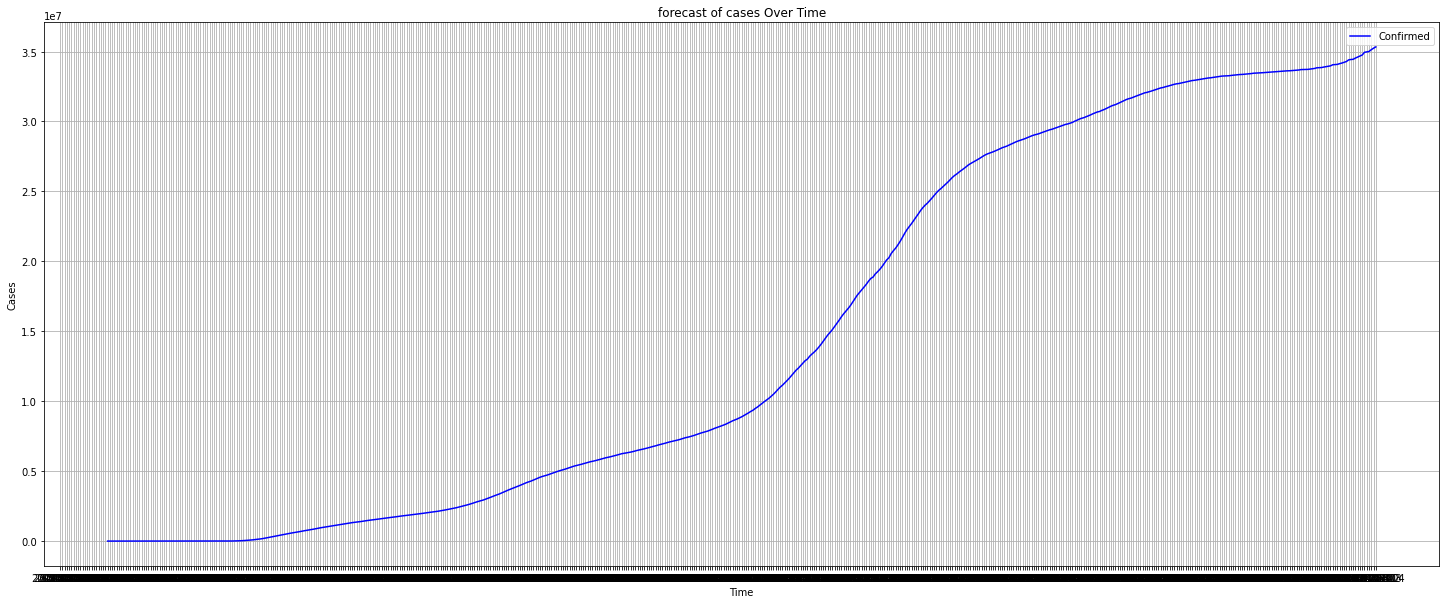

2021-08-05


In [ ]:
from datetime import datetime
plt.figure(figsize=(25,10))
plt.ylabel("Cases")
plt.grid(True)
time=pd.date_range(start='2021-05-01',end=datetime.date(datetime.now())).tolist()
plt.xlabel("Time")
plt.plot(cdf['ds'],cdf['y'],color='b',label ='Confirmed')
plt.title('forecast of cases Over Time')
plt.legend()
plt.show()
print(datetime.date(datetime.now()))

In [ ]:
df = df[['Date',prediction]].rename(columns = {'Date':'ds', prediction:'y'})

In [ ]:
df

,ds,y
146333,2020-01-01,NaN
146334,2020-01-02,NaN
146335,2020-01-03,NaN
146336,2020-01-04,NaN
146337,2020-01-05,NaN
...,...,...
146910,2021-07-31,34978276.0
146911,2021-08-01,35003417.0
146912,2021-08-02,35131393.0
146913,2021-08-03,35237950.0


In [ ]:
forecast_length = 30     #30 days from now
# instantiate and fit the model
model = Prophet()
model.fit(cdf)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future1 = model.make_future_dataframe(periods=forecast_length)  # make the forecast to the end of the 'future' dataframe
forecast = model.predict(future1)

In [ ]:
future1.tail()

,ds
607,2021-08-30
608,2021-08-31
609,2021-09-01
610,2021-09-02
611,2021-09-03


In [ ]:
today = datetime.date(datetime.now())
today
op = print(today)

2021-08-05


In [ ]:
td = str(today)

In [ ]:
to_plot = forecast[forecast.ds > td].merge(df, how='left')

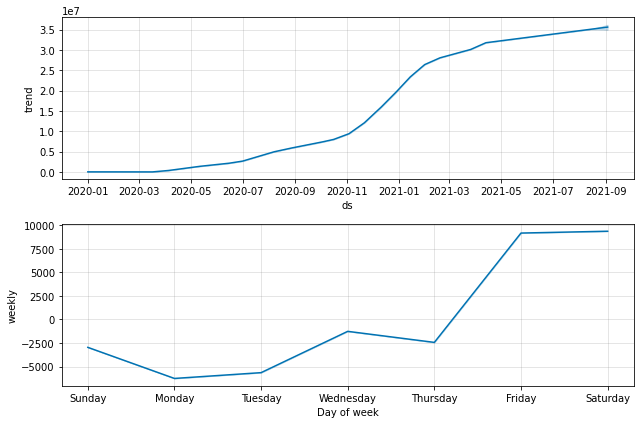

In [ ]:
fig = model.plot_components(forecast)

****PLOTTING THE GRAPH FOR FORECASTED DATA****

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



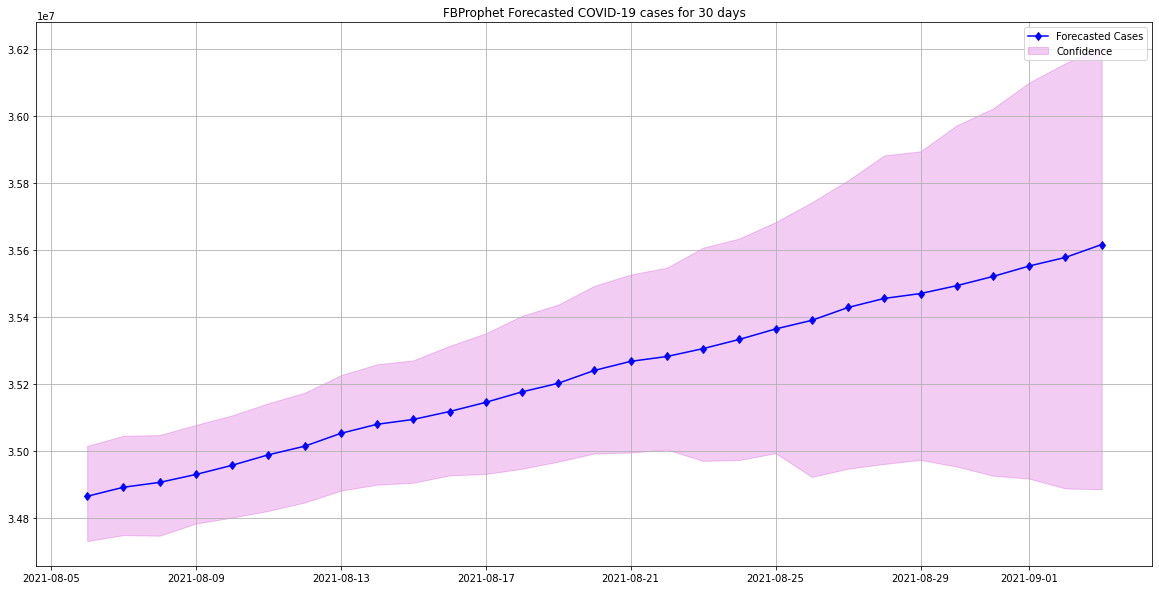



							  The "forecast" DataFrame 



In [ ]:
plt.figure(figsize = (20,8))
plt.plot(to_plot['ds'], to_plot['yhat'], label='Forecasted Cases',color='B',marker='d')
plt.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'], alpha=.2, label='Confidence',color='m',linestyle="solid")
plt.title('FBProphet Forecasted COVID-19 cases for 30 days')
plt.legend()
plt.grid(True)
plt.savefig('prophet_forecast.png')
plt.show()
print('\n\n\t\t\t\t\t\t\t  The "forecast" DataFrame \n')

# **Stage 3**

In [ ]:
# Assuming Holidays in the US 
# reference: https://www.calendarlabs.com/holidays/us/2020
holiday_dates = pd.DataFrame({
        'holiday':'2020-2021',
        'ds':pd.to_datetime(['2020-01-01','2020-01-20','2020-02-14','2020-02-17',
                             '2020-04-10','2020-04-12','2020-05-10','2020-05-25',
                             '2020-06-21','2020-07-03','2020-07-04','2020-09-07',
                             '2020-10-12','2020-10-31','2020-11-11','2020-11-26',
                             '2020-12-25',
                             '2021-01-01','2021-01-18','2021-02-14','2021-02-15',
                             '2021-04-02','2021-04-04','2021-05-09','2021-05-31',
                             '2021-06-04','2021-06-20','2021-07-04','2021-07-05',
                             '2021-09-06','2021-10-11','2021-10-31','2021-11-11',
                             '2021-11-25','2021-12-25'])
    })

In [ ]:
model2 = Prophet(interval_width=0.95, seasonality_mode='additive',
                 holidays=holiday_dates)

In [ ]:
model2.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model2.predict(future1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
607,2021-08-30,3.897681e+07,3.266715e+07,4.549670e+07
608,2021-08-31,3.902950e+07,3.263809e+07,4.578650e+07
609,2021-09-01,3.908818e+07,3.266043e+07,4.581827e+07
610,2021-09-02,3.914918e+07,3.258873e+07,4.603950e+07
611,2021-09-03,3.921253e+07,3.251400e+07,4.618782e+07


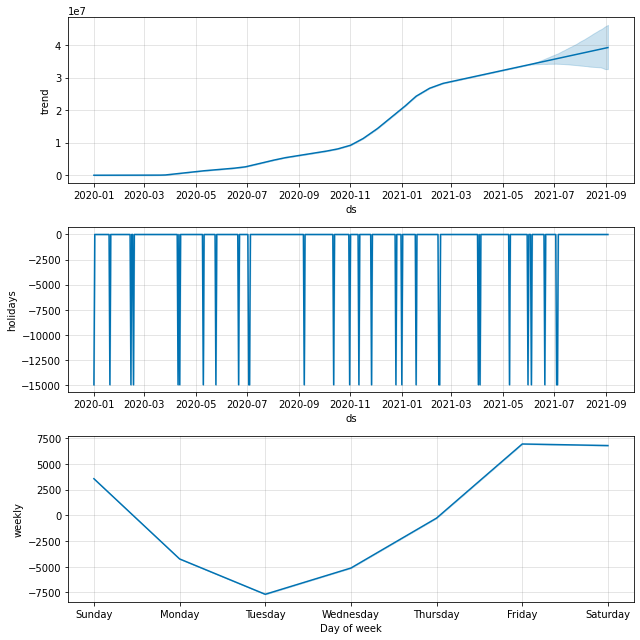

In [ ]:
fig2 = model2.plot_components(forecast)

In [ ]:
model3 = Prophet(interval_width=0.95, seasonality_mode='additive',
                 holidays=holiday_dates)

In [ ]:
model3.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model3.predict(future1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
607,2021-08-30,3.730476e+07,3.681723e+07,3.776573e+07
608,2021-08-31,3.738774e+07,3.688797e+07,3.786348e+07
609,2021-09-01,3.746968e+07,3.694707e+07,3.796953e+07
610,2021-09-02,3.753994e+07,3.698155e+07,3.807545e+07
611,2021-09-03,3.764948e+07,3.707067e+07,3.822112e+07


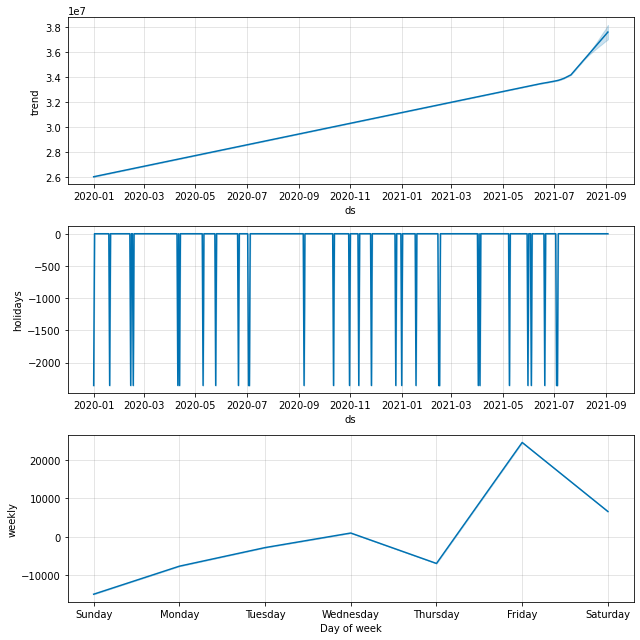

In [ ]:
fig3 = model3.plot_components(forecast)